In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report



In [23]:
categories = ["Running", "Playing with Toys", "Eating", "Sleeping"]


In [24]:
np.random.seed(42)
data = []
labels = []
for _ in range(1000):
    category = np.random.choice(categories)
    if category == "Running":
        features = np.random.normal(loc=5, scale=2, size=5)
    elif category == "Playing with Toys":
        features = np.random.normal(loc=3, scale=1, size=5)
    elif category == "Eating":
        features = np.random.normal(loc=2, scale=1, size=5)
    else:  # Sleeping
        features = np.random.normal(loc=1, scale=0.5, size=5)
    data.append(features)
    labels.append(category)


In [25]:
df = pd.DataFrame(data, columns=["Feature1", "Feature2", "Feature3", "Feature4", "Feature5"])
df["Activity"] = labels

In [26]:
df.head(5)

,Feature1,Feature2,Feature3,Feature4,Feature5,Activity
0,1.449766,2.515433,2.473861,3.368450,1.083173,Eating
1,1.875853,2.279041,3.010515,1.419122,1.474830,Eating
2,7.924756,8.077430,0.121788,6.206882,4.497912,Running
3,2.836133,3.067528,1.575252,2.455617,3.110923,Playing with Toys
4,1.474877,3.912771,-0.026720,3.119424,2.779193,Eating


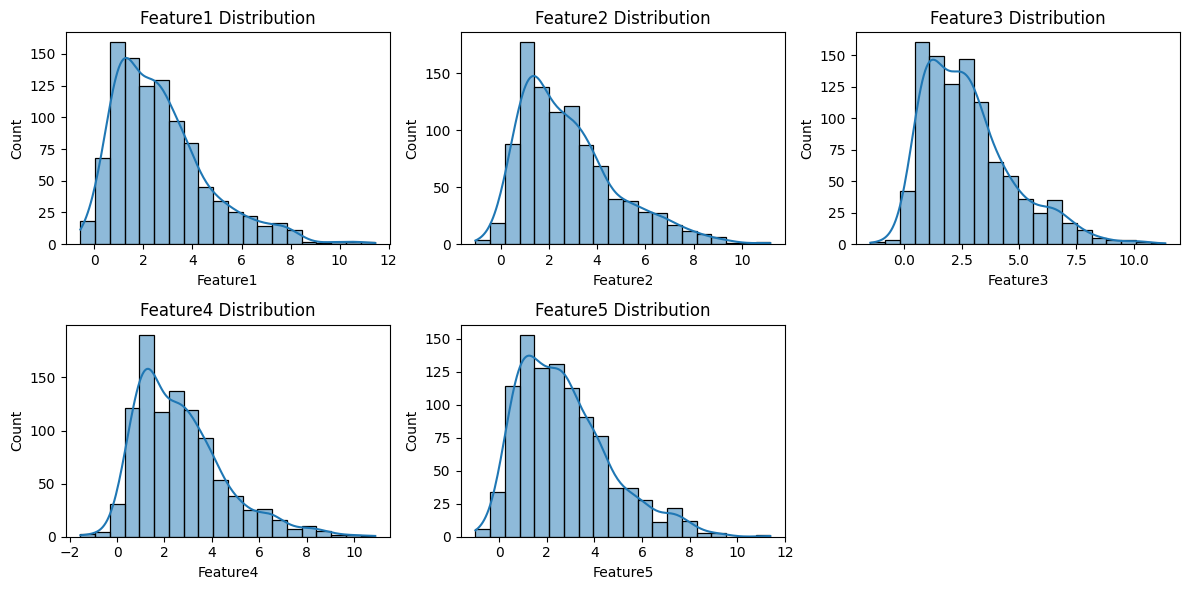

In [27]:
# Plot histograms for each feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()


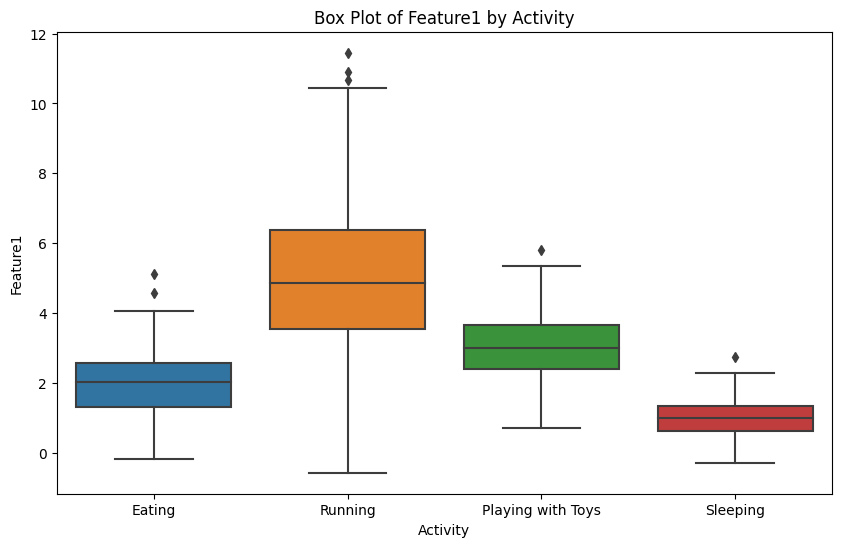

In [28]:
# Plot box plots for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(x="Activity", y="Feature1", data=df)
plt.title("Box Plot of Feature1 by Activity")
plt.show()


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


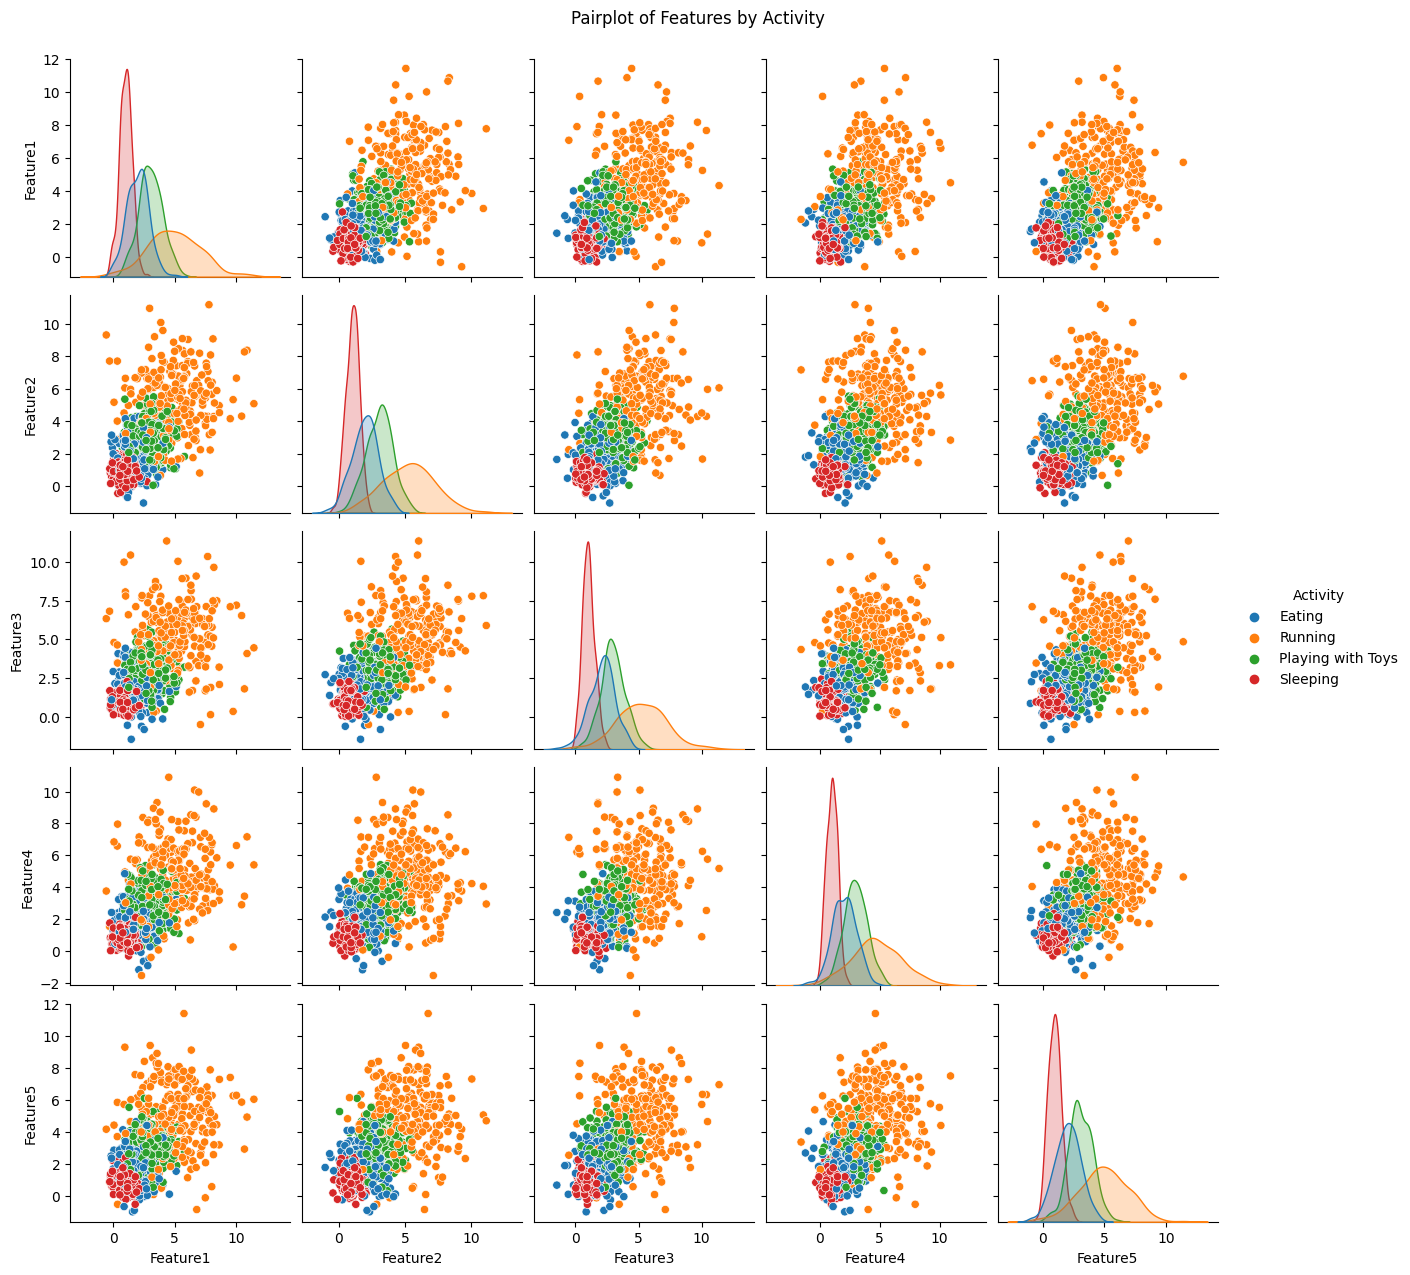

In [29]:
# Create a pairplot to visualize feature relationships
sns.pairplot(df, hue="Activity")
plt.suptitle("Pairplot of Features by Activity", y=1.02)
plt.show()


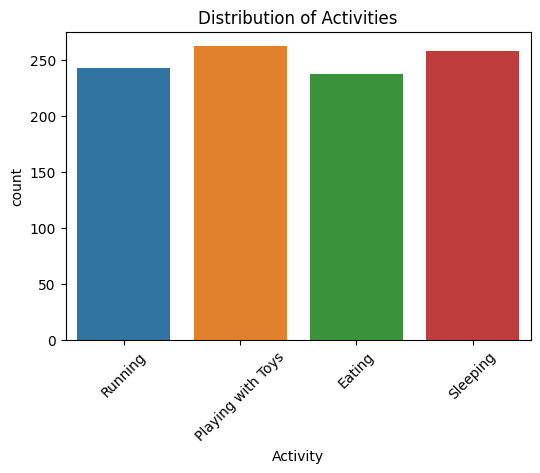

In [30]:
# Plot a countplot to show the distribution of activities
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Activity", order=categories)
plt.xticks(rotation=45)
plt.title("Distribution of Activities")
plt.show()


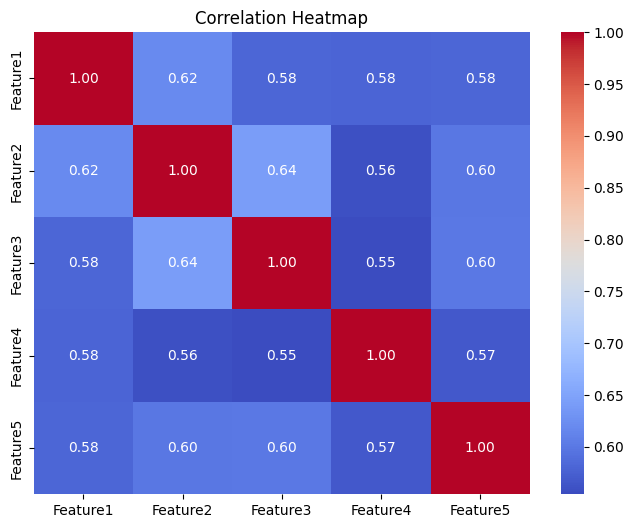

In [31]:
plt.figure(figsize=(8, 6))
correlation_matrix = df.drop("Activity", axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [32]:
X = df.drop("Activity", axis=1)
y = df["Activity"]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)
y_pred= model1.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.905


In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[44  2  0  1]
 [11 37  1  0]
 [ 0  3 47  0]
 [ 1  0  0 53]]


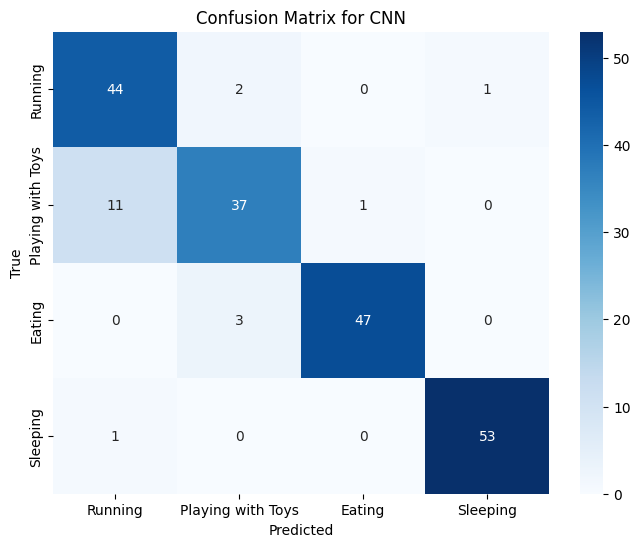

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for CNN")
plt.show()

In [38]:
y_pred_prob = model1.predict_proba(X_test)
n_classes = len(categories)

In [39]:
classification_rep = classification_report(y_test, y_pred, target_names=categories, output_dict=True)

# Print the classification report
print("Classification Report:")
for category in categories:
    print(f"Category: {category}")
    print(f"Precision: {classification_rep[category]['precision']:.2f}")
    print(f"Recall: {classification_rep[category]['recall']:.2f}")
    print(f"F1-Score: {classification_rep[category]['f1-score']:.2f}")
    print(f"Support: {classification_rep[category]['support']}")
    print()



Classification Report:
Category: Running
Precision: 0.79
Recall: 0.94
F1-Score: 0.85
Support: 47.0

Category: Playing with Toys
Precision: 0.88
Recall: 0.76
F1-Score: 0.81
Support: 49.0

Category: Eating
Precision: 0.98
Recall: 0.94
F1-Score: 0.96
Support: 50.0

Category: Sleeping
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
Support: 54.0



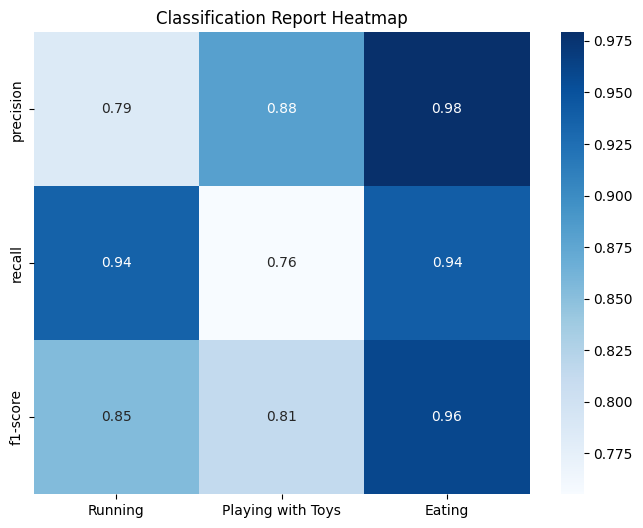

In [40]:
# Create a heatmap of the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_rep).iloc[:-1, :3], annot=True, cmap="Blues")
plt.title("Classification Report Heatmap")
plt.show()